# Recognition System Assignment 2

Nadya Aditama<br>
1301154556<br>
ICM-39-GAB

#### Do import package first

In [80]:
import numpy as np # Using namespace abbreviation to import numerical python
from sympy import init_printing, symbols, Matrix, Eq # Imporint only the
# required functions in the sympy module
import matplotlib.pyplot as plt # Using namespace abbreviation to import
# the pyplot submodule of matplotlib
import seaborn as sns # Using namespace abbreviation to import
# the seaborn plotting library
from IPython.display import Image
from warnings import filterwarnings

import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.transform import rescale
from skimage import img_as_float

init_printing(use_latex = 'mathjax') # Used to print Latex to the screen
%matplotlib inline
filterwarnings('ignore') # Ignore those ugly pink warning boxes

#### Manipulasi Vektor/Matriks; Aljabar Linear

Diberikan Matriks M dan Vektor a, b, c sebagai berikut

a. Buat definisi Matriks M dan Vektor a, b, c. Salah satu package Python yang umum digunakan untuk permasalahan terkait aljabar linear seperti ini adalah Numpy.

In [2]:
M = Matrix([[1, 2, 3], [4, 5, 6], [7,8,9], [0,2,2]])
M

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎢7  8  9⎥
⎢       ⎥
⎣0  2  2⎦

In [3]:
a = Matrix([[1], [1], [0]])
a

⎡1⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦

In [4]:
b = Matrix([[-1], [2], [5]])
b

⎡-1⎤
⎢  ⎥
⎢2 ⎥
⎢  ⎥
⎣5 ⎦

In [5]:
c = Matrix([[0],[2],[3],[2]])
c

⎡0⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎢3⎥
⎢ ⎥
⎣2⎦

b. Hitung dot product dari vektor a dan b. Simpan nilainya ke dalam variabel aDotb dan tampilkan nilainya ke layar.

In [6]:
aDotb = b.transpose()*a
aDotb

[1]

c. Hitung element-wise product dari vektor a dan b. Tampilkan hasilnya ke layar

In [7]:
np.multiply(a, b)

array([[-1],
       [2],
       [0]], dtype=object)

d. Hitung (a^T b)Ma. Tampilkan hasilnya ke layar

In [8]:
#hitung a^Tb
perkalian1 = a.transpose()*b
perkalian2 = M * a
perkalian1*perkalian2

ShapeError: Matrix size mismatch: (1, 1) * (4, 1).

e. Tanpa menggunakan loop, hitung perkalian element-wise dari tiap baris M dengan a. Tampilkan hasilnya ke layar. Petunjuk, bisa menggunakan fungsi repmat()

f. Tanpa menggunakan loop, urutkan semua nilai dari M yang baru (dari hasil e) terurut dari nilai terkecil ke terbesar lalu buat dalam grafik/plot.

#### Basic Image Manipulation

Read in the images, image1.jpg and image2.jpg, as color images.

In [66]:
image1 = plt.imread('image1.jpg');
image2 = plt.imread('image2.jpg');

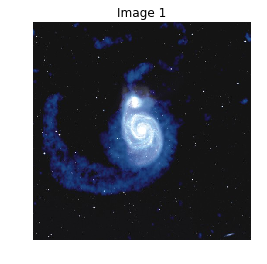

In [76]:
fig, (ax1) = plt.subplots(
    1, 1)
ax1.imshow(image1)
ax1.set_title('Image 1')
ax1.set_axis_off()

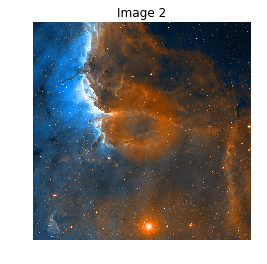

In [77]:
fig, (ax1) = plt.subplots(
    1, 1)
ax1.imshow(image2)
ax1.set_title('Image 2')
ax1.set_axis_off()

Convert the images to double precision and rescale them to stretch from minimum value 0 to maximum value 1.

In [78]:
#Convert image to double precission
image1_doubleps=skimage.img_as_float64(image1, force_copy=False)
image2_doubleps=skimage.img_as_float64(image2, force_copy=False)

Add the images together and re-normalize them to have minimum value 0 and maximum value 1. Display this new image.

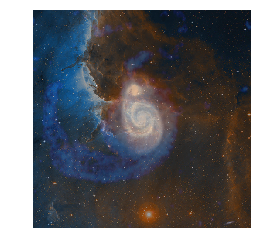

In [70]:
imagesMerge = image1_doubleps + image2_doubleps
imagesMergeNormalization = imagesMerge/(imagesMerge.max())

fig, (ax1) = plt.subplots(
    1, 1)
ax1.imshow(imagesMergeNormalization)
ax1.set_axis_off()

Create a new image such that the left half of the image is the left half of image1 and the right half of the image is the right half of image2. Display this new image.

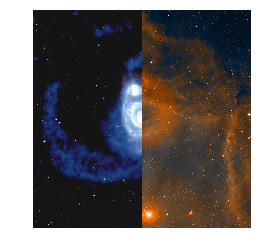

In [71]:
import PIL
imageHalf1 = image1[0:500,0:250,:]
imageHalf2 = image2[0:500,250:500,:]
imgnew=np.concatenate((imageHalf1, imageHalf2), axis=1)
fig, (ax1) = plt.subplots(
    1, 1)
ax1.imshow(imgnew)
ax1.set_axis_off()

Using a for loop, create a new image such that every odd numbered row is the corresponding row from image1 and the every even row is the corresponding row from image2.

In [72]:
imgNew1=np.empty((500,500,3))
for i in range(image1_doubleps.shape[0]):
    for j in range(image1_doubleps.shape[1]):
        for k in range(image1_doubleps.shape[2]):
            if i%2==0:
                imgNew1[i,:,:] = image1_doubleps[i,:,:]
            else:
                imgNew1[i,:,:] = image2_doubleps[i,:,:] 

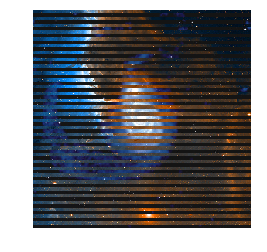

In [73]:
fig, (ax1) = plt.subplots(
    1, 1)
ax1.imshow(imgNew1)
ax1.set_axis_off()

Accomplish the same task as part e without using a for-loop (the functions reshape and
repmat may be helpful here).

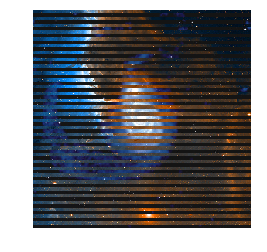

In [74]:
imgq=np.zeros((500,500,3))
imgodd=image1_doubleps[::2]
imgeven=image2_doubleps[1::2]
imgq[::2]=imgodd
imgq[1::2]=imgeven
fig, (ax1) = plt.subplots(
    1, 1)
ax1.imshow(imgq)
ax1.set_axis_off()

Convert the result from part f to a grayscale image. Display the grayscale image with a title

In [75]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

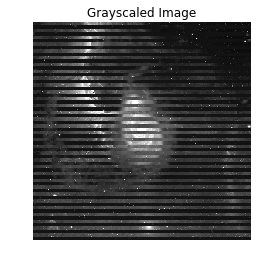

In [63]:
fig, (ax1) = plt.subplots(
    1, 1)
ax1.imshow(rgb2gray(imgq),cmap='gray')
ax1.set_title('Grayscaled Image')
ax1.set_axis_off()